In [17]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os
from pysal.esda.mapclassify import Quantiles, Equal_Interval

In [18]:
nums_to_months = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        0: "December"}

In [19]:
# set the filepath and load in a shapefile
fp = "states_21basic/states.shp"
map_df = gpd.read_file(fp)
#Check geodataframe
map_df.head()

STATE_NAME  DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
0        Hawaii        1         15             Pacific         HI   
1    Washington        2         53             Pacific         WA   
2       Montana        3         30            Mountain         MT   
3         Maine        4         23         New England         ME   
4  North Dakota        5         38  West North Central         ND   

                                            geometry  
0  (POLYGON ((-160.0738033454681 22.0041773479577...  
1  (POLYGON ((-122.4020153103835 48.2252163723779...  
2  POLYGON ((-111.4754253002074 44.70216236909688...  
3  (POLYGON ((-69.77727626137293 44.0741483685119...  
4  POLYGON ((-98.73043728833767 45.93827137024809...

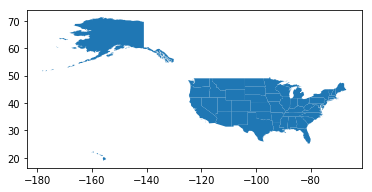

In [20]:
#Make sure it looks sensical
map_df.plot()

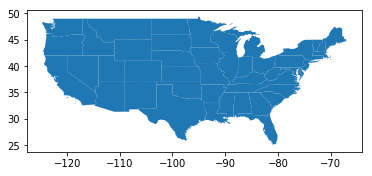

In [21]:
#We're just looking at the continental US
map_df = map_df.set_index('STATE_NAME')
map_df = map_df.drop('Alaska',axis=0)
map_df = map_df.drop('Hawaii',axis=0)
map_df.plot()

In [22]:
#Read in example interest levels and check
df = pd.read_csv("geoMap.csv", header=0)
df.head()

Region  Interest
0              Delaware       100
1            New Jersey        80
2          Pennsylvania        80
3               Indiana        78
4  District of Columbia        72

In [24]:
# join the geodataframe with the interest levels dataframe
merged = map_df.join(df.set_index('Region'))
merged.head()

DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
STATE_NAME                                                        
Washington          2         53             Pacific         WA   
Montana             3         30            Mountain         MT   
Maine               4         23         New England         ME   
North Dakota        5         38  West North Central         ND   
South Dakota        6         46  West North Central         SD   

                                                       geometry  Interest  
STATE_NAME                                                                 
Washington    (POLYGON ((-122.4020153103835 48.2252163723779...        38  
Montana       POLYGON ((-111.4754253002074 44.70216236909688...        47  
Maine         (POLYGON ((-69.77727626137293 44.0741483685119...        67  
North Dakota  POLYGON ((-98.73043728833767 45.93827137024809...        61  
South Dakota  POLYGON ((-102.7883842921169 42.99530336750724...        41

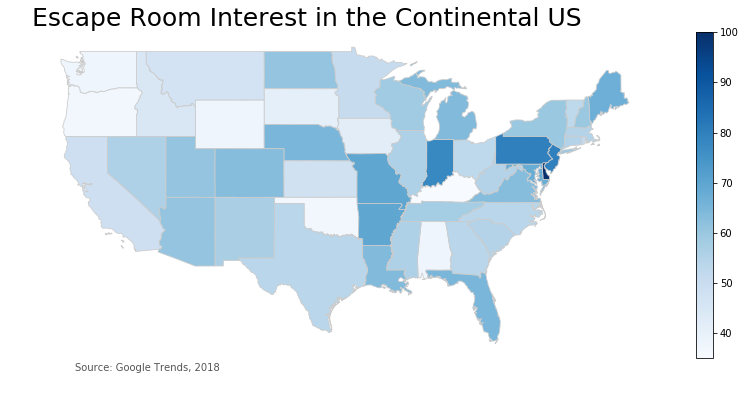

In [29]:
# Create a single choropleth to make sure it's working
variable = 'Interest'
vmin, vmax = 35, 100
fig, ax = plt.subplots(1, figsize=(14, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Escape Room Interest in the Continental US', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3',}, loc='left')

# create an annotation
ax.annotate('Source: Google Trends, 2018',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#Save the figure as a test
fig.savefig('testmap.png', dpi=100)

In [30]:
#Initialize the master interst level dataframe
df_tot = pd.read_csv("ER_Data/geoMap (1).csv", header=1)
df_tot = df_tot.set_index('Region')

#Set the timespan
months = 69

#Build the master dataframe from each csv
for i in range(2,(months+1)):
    df_temp = pd.read_csv("ER_Data/geoMap (" + str(i) + ").csv", header=1)
    df_tot = df_tot.join(df_temp.set_index('Region'))
df_tot.head()

escape room: (1/1/13 - 2/1/13)  escape room: (3/1/13 - 4/1/13)  \
Region                                                                          
North Dakota                              100                            81.0   
Rhode Island                               92                            46.0   
New Hampshire                              90                            18.0   
Wyoming                                    83                           100.0   
Delaware                                   83                             NaN   

               escape room: (2/1/13 - 3/1/13)  escape room: (4/1/13 - 5/1/13)  \
Region                                                                          
North Dakota                             78.0                           100.0   
Rhode Island                             29.0                            35.0   
New Hampshire                            23.0                            18.0   
Wyoming                                   NaN                            65.0   
Delaware                                 41.0                             NaN   

               escape room: (5/1/13 - 6/1/13)  escape room: (6/1/13 - 7/1/13)  \
Region                                                                          
North Dakota                               47                             NaN   
Rhode Island                               17                            88.0   
New Hampshire                              33                            33.0   
Wyoming                                   100                           100.0   
Delaware                                   47                            31.0   

               escape room: (7/1/13 - 8/1/13)  escape room: (8/1/13 - 9/1/13)  \
Region                                                                          
North Dakota                             45.0                            89.0   
Rhode Island                             47.0                            37.0   
New Hampshire                            55.0                            47.0   
Wyoming                                   NaN                             NaN   
Delaware                                 72.0                            94.0   

               escape room: (9/1/13 - 10/1/13)  \
Region                                           
North Dakota                               NaN   
Rhode Island                              22.0   
New Hampshire                             26.0   
Wyoming                                    NaN   
Delaware                                  35.0   

               escape room: (10/1/13 - 11/1/13)  \
Region                                            
North Dakota                               33.0   
Rhode Island                               12.0   
New Hampshire                              24.0   
Wyoming                                    34.0   
Delaware                                  100.0   

                            ...                 \
Region                      ...                  
North Dakota                ...                  
Rhode Island                ...                  
New Hampshire               ...                  
Wyoming                     ...                  
Delaware                    ...                  

               escape room: (12/1/17 - 1/1/18)  \
Region                                           
North Dakota                               100   
Rhode Island                                57   
New Hampshire                               84   
Wyoming                                     40   
Delaware                                    96   

               escape room: (1/1/18 - 2/1/18)  escape room: (2/1/18 - 3/1/18)  \
Region                                                                          
North Dakota                               91                              86   
Rhode Island                               65                              63   
New Hamp

In [31]:
#Set the column names to be more sensical and easier to loop through
list_of_months = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Month_13', 'Month_14', 'Month_15', 'Month_16', 'Month_17', 'Month_18',
       'Month_19', 'Month_20', 'Month_21', 'Month_22', 'Month_23', 'Month_24',
       'Month_25', 'Month_26', 'Month_27', 'Month_28', 'Month_29', 'Month_30',
       'Month_31', 'Month_32', 'Month_33', 'Month_34', 'Month_35', 'Month_36',
       'Month_37', 'Month_38', 'Month_39', 'Month_40', 'Month_41', 'Month_42',
       'Month_43', 'Month_44', 'Month_45', 'Month_46', 'Month_47', 'Month_48',
       'Month_49', 'Month_50', 'Month_51', 'Month_52', 'Month_53', 'Month_54',
       'Month_55', 'Month_56', 'Month_57', 'Month_58', 'Month_59', 'Month_60',
       'Month_61', 'Month_62', 'Month_63', 'Month_64', 'Month_65', 'Month_66',
       'Month_67', 'Month_68', 'Month_69']

df_tot.columns = list_of_months
df_tot.head()

Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
Region                                                                         
North Dakota       100     81.0     78.0    100.0       47      NaN     45.0   
Rhode Island        92     46.0     29.0     35.0       17     88.0     47.0   
New Hampshire       90     18.0     23.0     18.0       33     33.0     55.0   
Wyoming             83    100.0      NaN     65.0      100    100.0      NaN   
Delaware            83      NaN     41.0      NaN       47     31.0     72.0   

               Month_8  Month_9  Month_10    ...     Month_60  Month_61  \
Region                                       ...                          
North Dakota      89.0      NaN      33.0    ...          100        91   
Rhode Island      37.0     22.0      12.0    ...           57        65   
New Hampshire     47.0     26.0      24.0    ...           84        77   
Wyoming            NaN      NaN      34.0    ...           40        72   
Delaware          94.0     35.0     100.0    ...           96        84   

               Month_62  Month_63  Month_64  Month_65  Month_66  Month_67  \
Region                                                                      
North Dakota         86       100        97        77        62        77   
Rhode Island         63        43        66        55        37        51   
New Hampshire        84        87       100        65        57        73   
Wyoming              68        61        66        60        70        51   
Delaware             92        84        84        98        59        95   

               Month_68  Month_69  
Region                             
North Dakota         69        78  
Rhode Island         66        33  
New Hampshire        96        67  
Wyoming              81        62  
Delaware             90        62  

[5 rows x 69 columns]

In [32]:
#Monthly data comes normalized to 100 each month,
#so to compare month-to-month we need to normalize
#to the max value for that month

#Read in the data to normalize to as 'norm'
norm = pd.read_csv("ER_Data/Normalize.csv", header=1)
norm.columns = ['Month', 'ER_Interest']
norm.head()

Month  ER_Interest
0  2013-01            5
1  2013-02            5
2  2013-03            5
3  2013-04            5
4  2013-05            5

In [33]:
#Initialize normalized dataframe
df_normalized = df_tot

#normalize each month to the 'norm' dataframe
for i in range(months):
    interest = norm.ER_Interest[i]/100.0
    df_normalized["Month_{x}".format(x=(i+1))] = df_tot["Month_{x}".format(x=(i+1))]*interest

df_normalized.head()

Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
Region                                                                         
North Dakota      5.00     4.05     3.90     5.00     2.35      NaN     4.95   
Rhode Island      4.60     2.30     1.45     1.75     0.85     7.04     5.17   
New Hampshire     4.50     0.90     1.15     0.90     1.65     2.64     6.05   
Wyoming           4.15     5.00      NaN     3.25     5.00     8.00      NaN   
Delaware          4.15      NaN     2.05      NaN     2.35     2.48     7.92   

               Month_8  Month_9  Month_10    ...     Month_60  Month_61  \
Region                                       ...                          
North Dakota      6.23      NaN      1.65    ...         90.0     80.99   
Rhode Island      2.59     1.10      0.60    ...         51.3     57.85   
New Hampshire     3.29     1.30      1.20    ...         75.6     68.53   
Wyoming            NaN      NaN      1.70    ...         36.0     64.08   
Delaware          6.58     1.75      5.00    ...         86.4     74.76   

               Month_62  Month_63  Month_64  Month_65  Month_66  Month_67  \
Region                                                                      
North Dakota      73.10      90.0     74.69     54.67     50.84     75.46   
Rhode Island      53.55      38.7     50.82     39.05     30.34     49.98   
New Hampshire     71.40      78.3     77.00     46.15     46.74     71.54   
Wyoming           57.80      54.9     50.82     42.60     57.40     49.98   
Delaware          78.20      75.6     64.68     69.58     48.38     93.10   

               Month_68  Month_69  
Region                             
North Dakota      60.03     58.50  
Rhode Island      57.42     24.75  
New Hampshire     83.52     50.25  
Wyoming           70.47     46.50  
Delaware          78.30     46.50  

[5 rows x 69 columns]

In [34]:
df_normalized.fillna(0, inplace=True)

#Smooth values to a 3-month moving average to reduce the jumpiness of the gif
for i in range(1,(months-1)):
    df_normalized["Month_{x}".format(x=(i+1))] = (df_normalized["Month_{x}".format(x=(i))] + df_normalized["Month_{x}".format(x=(i+1))] + df_normalized["Month_{x}".format(x=(i+2))])/3

df_normalized.head()

Month_1   Month_2   Month_3   Month_4   Month_5   Month_6  \
Region                                                                     
North Dakota      5.00  4.316667  4.405556  3.918519  2.089506  2.346502   
Rhode Island      4.60  2.783333  1.994444  1.531481  3.140494  5.116831   
New Hampshire     4.50  2.183333  1.411111  1.320370  1.870123  3.520041   
Wyoming           4.15  3.050000  2.100000  3.450000  5.483333  4.494444   
Delaware          4.15  2.066667  1.372222  1.240741  2.023580  4.141193   

                Month_7   Month_8   Month_9  Month_10    ...      Month_60  \
Region                                                   ...                 
North Dakota   4.508834  3.579611  1.743204  1.131068    ...     77.797455   
Rhode Island   4.292277  2.660759  1.453586  1.267862    ...     54.043516   
New Hampshire  4.286680  2.958893  1.819631  1.239877    ...     72.431739   
Wyoming        1.498148  0.499383  0.733128  2.477709    ...     44.084679   
Delaware       6.213731  4.847910  3.865970  4.105323    ...     76.543118   

                Month_61   Month_62   Month_63   Month_64   Month_65  \
Region                                                                 
North Dakota   77.295818  80.131939  81.607313  70.322438  58.610813   
Rhode Island   55.147839  49.132613  46.217538  45.362513  38.250838   
New Hampshire  70.787246  73.495749  76.265250  66.471750  53.120583   
Wyoming        55.321560  56.007187  53.909062  49.109687  49.703229   
Delaware       76.501039  76.767013  72.349004  68.869668  62.276556   

                Month_66   Month_67   Month_68  Month_69  
Region                                                    
North Dakota   61.636938  65.708979  61.412993     58.50  
Rhode Island   39.523613  48.974538  43.714846     24.75  
New Hampshire  57.133528  70.731176  68.167059     50.25  
Wyoming        52.361076  57.603692  58.191231     46.50  
Delaware       67.918852  79.772951  68.190984     46.50  

[5 rows x 69 columns]

In [35]:
#join with the geodataframe to get ready to produce PNGs
merged = map_df.join(df_normalized)
merged.head()

DRAWSEQ STATE_FIPS          SUB_REGION STATE_ABBR  \
STATE_NAME                                                        
Washington          2         53             Pacific         WA   
Montana             3         30            Mountain         MT   
Maine               4         23         New England         ME   
North Dakota        5         38  West North Central         ND   
South Dakota        6         46  West North Central         SD   

                                                       geometry  Month_1  \
STATE_NAME                                                                 
Washington    (POLYGON ((-122.4020153103835 48.2252163723779...     0.75   
Montana       POLYGON ((-111.4754253002074 44.70216236909688...     2.10   
Maine         (POLYGON ((-69.77727626137293 44.0741483685119...     2.95   
North Dakota  POLYGON ((-98.73043728833767 45.93827137024809...     5.00   
South Dakota  POLYGON ((-102.7883842921169 42.99530336750724...     2.60   

               Month_2   Month_3   Month_4   Month_5    ...      Month_60  \
STATE_NAME                                              ...                 
Washington    1.033333  1.111111  1.003704  1.301235    ...     48.621034   
Montana       1.416667  1.755556  2.001852  2.423951    ...     70.548228   
Maine         2.333333  2.327778  1.975926  3.238642    ...     63.256167   
North Dakota  4.316667  4.405556  3.918519  2.089506    ...     77.797455   
South Dakota  2.466667  2.422222  2.340741  2.786914    ...     49.063197   

               Month_61   Month_62   Month_63   Month_64   Month_65  \
STATE_NAME                                                            
Washington    46.730345  42.993448  42.034483  42.051494  42.667165   
Montana       69.066076  64.938692  60.739564  56.753188  47.091063   
Maine         64.478722  68.409574  69.046525  59.822175  49.757392   
North Dakota  77.295818  80.131939  81.607313  70.322438  58.610813   
South Dakota  43.087732  42.462577  45.497526  44.509175  40.789725   

               Month_66   Month_67   Month_68  Month_69  
STATE_NAME                                               
Washington    44.442388  45.900796  46.630265     48.75  
Montana       45.957021  54.639007  61.683002     71.25  
Maine         50.732464  57.244155  56.371385     45.75  
North Dakota  61.636938  65.708979  61.412993     58.50  
South Dakota  42.663242  41.974414  33.431471     27.00  

[5 rows x 74 columns]

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


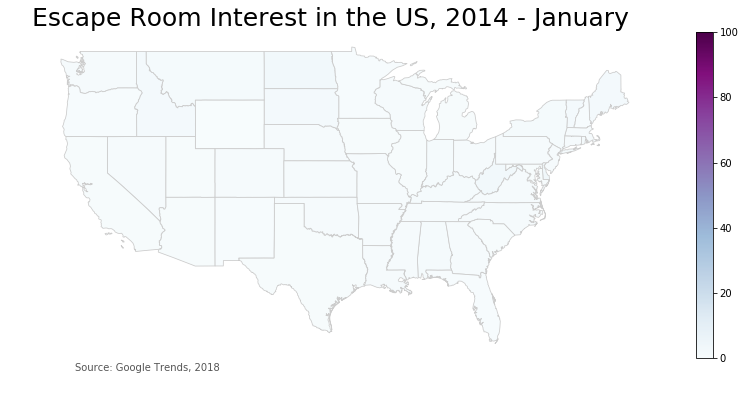

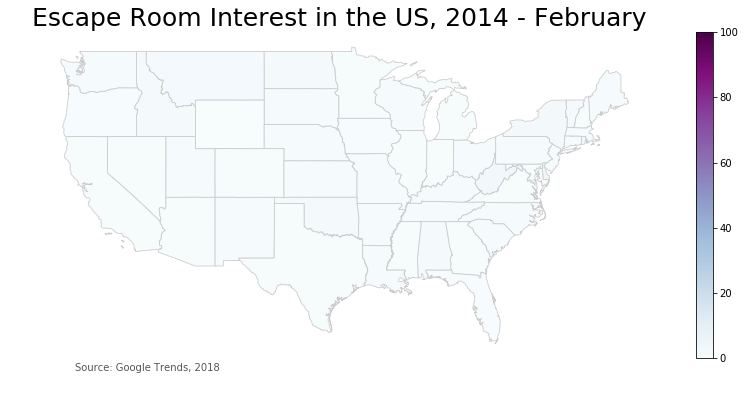

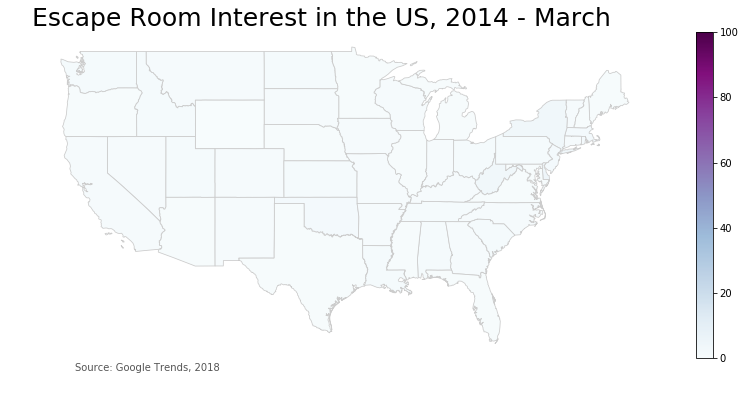

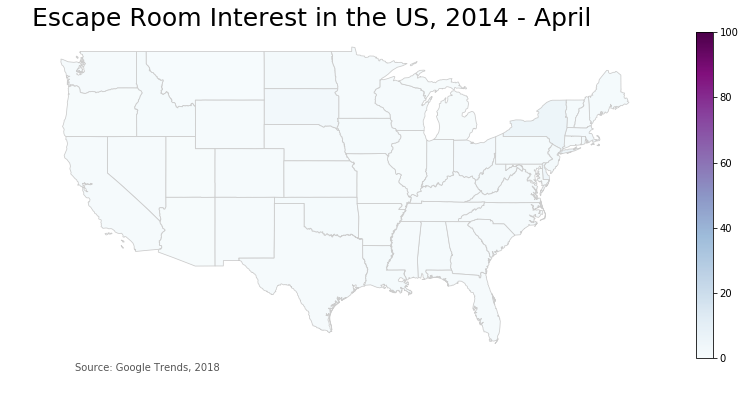

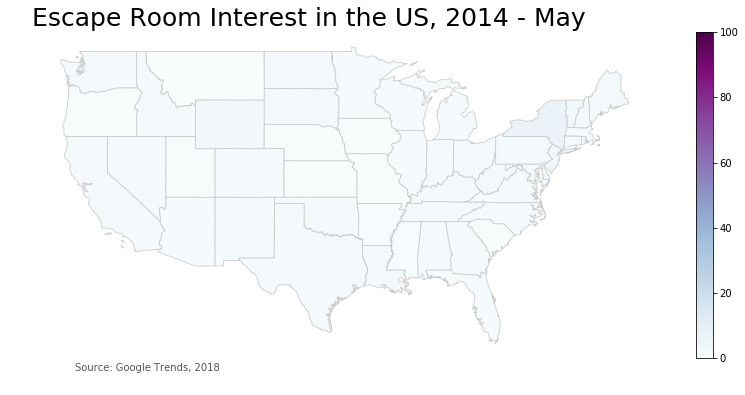

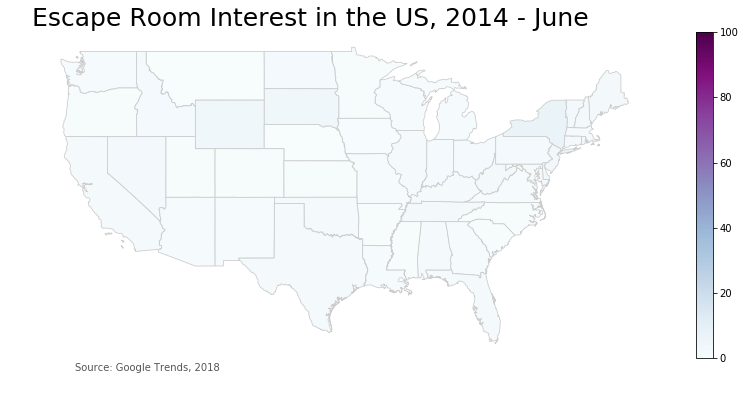

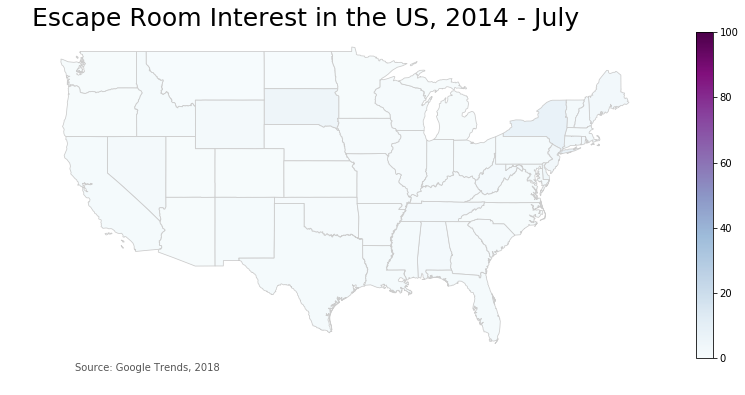

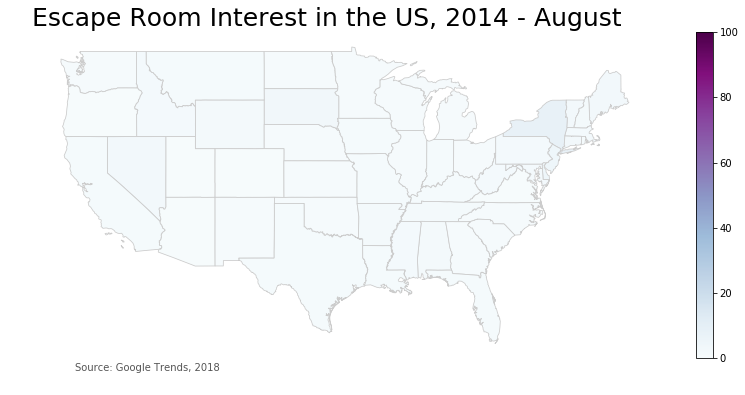

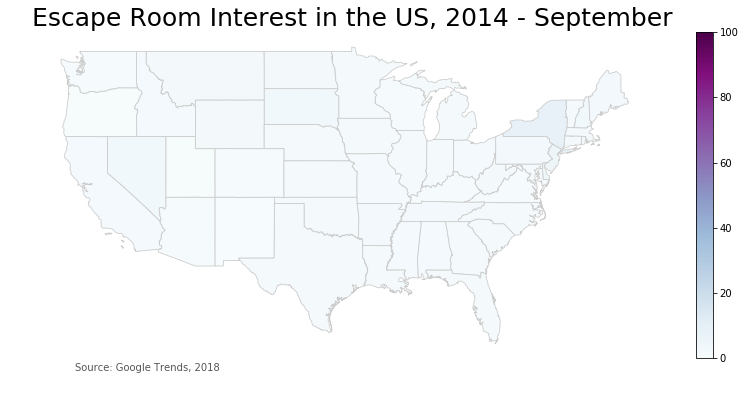

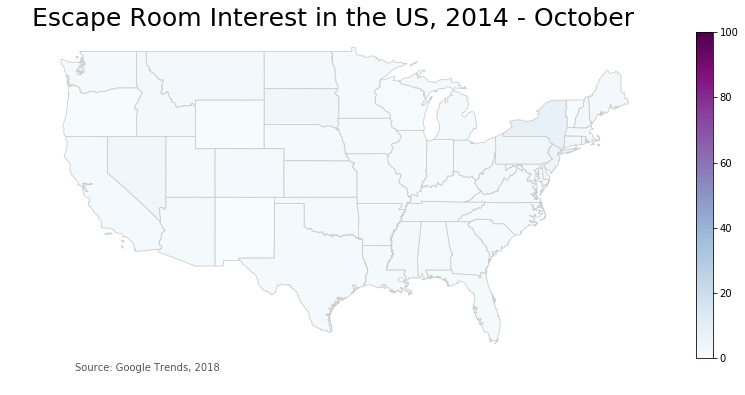

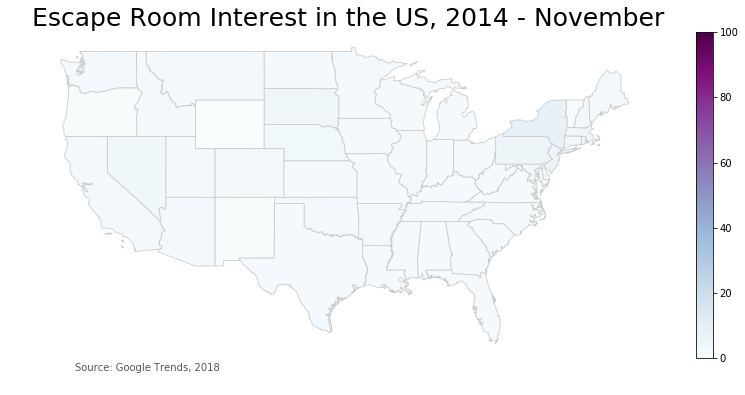

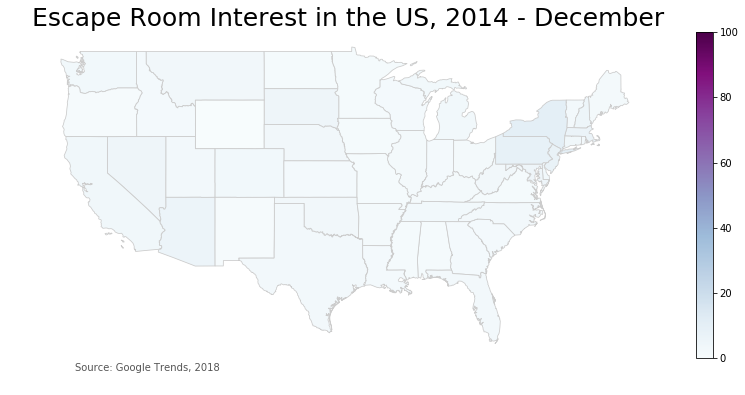

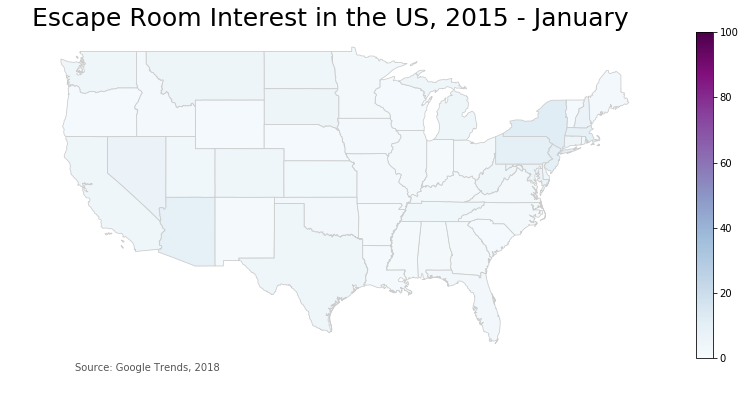

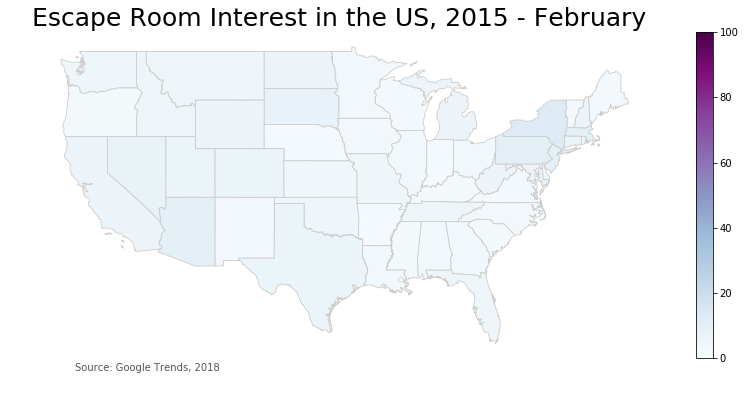

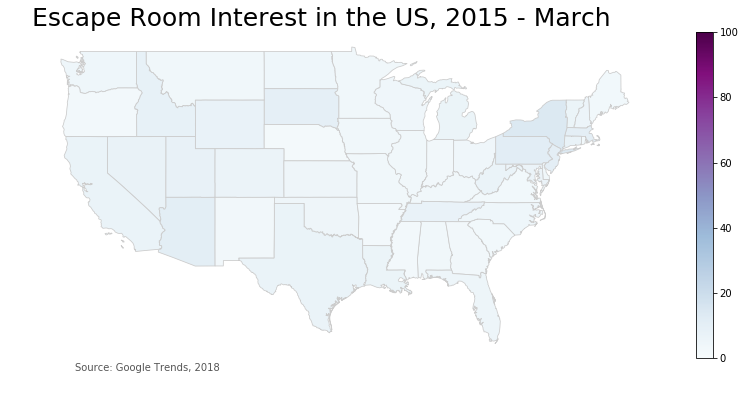

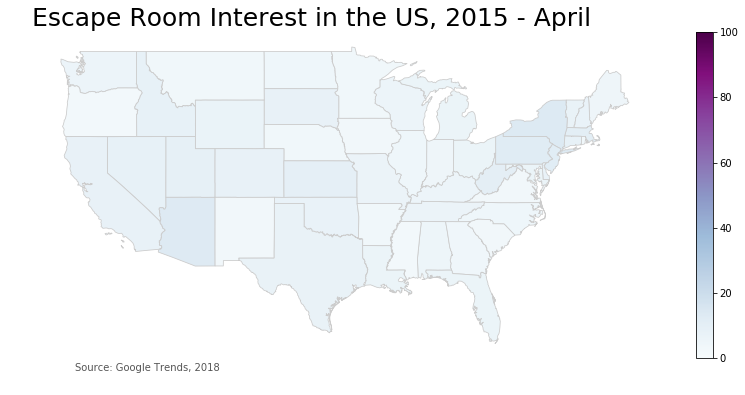

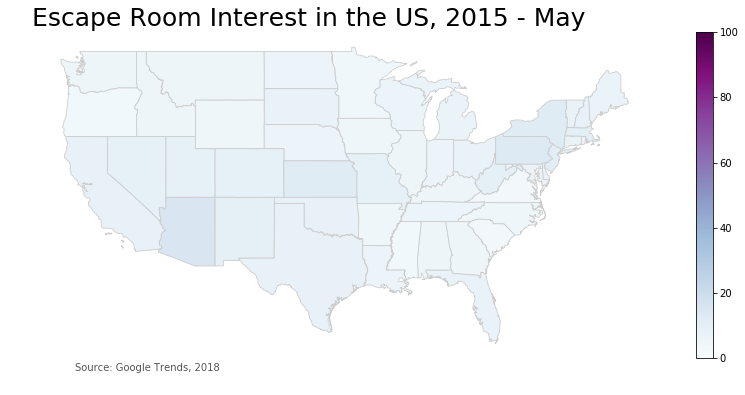

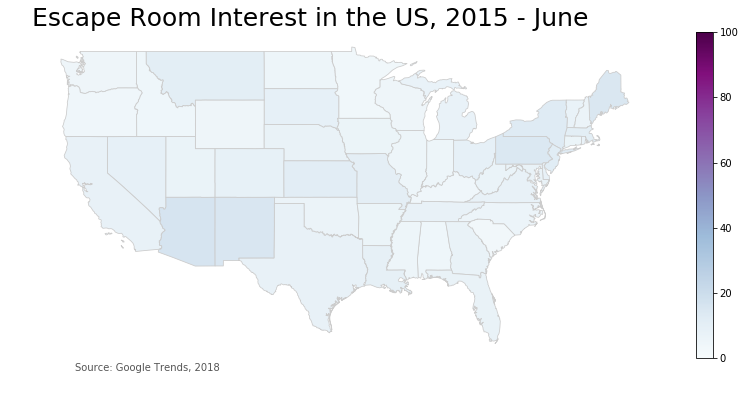

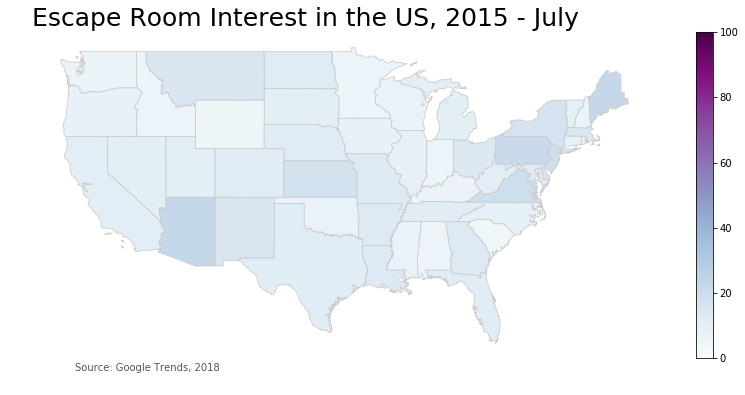

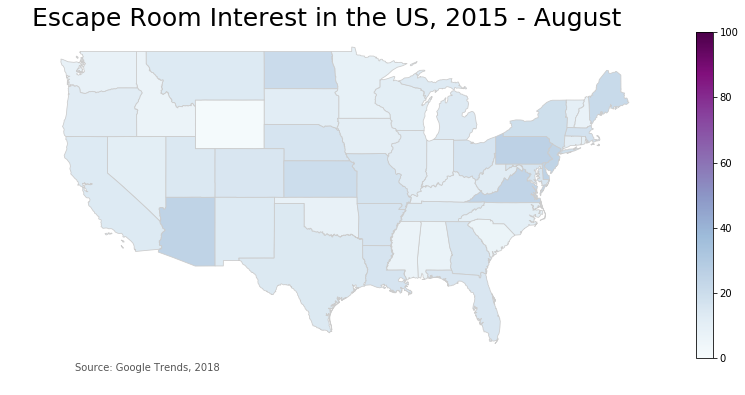

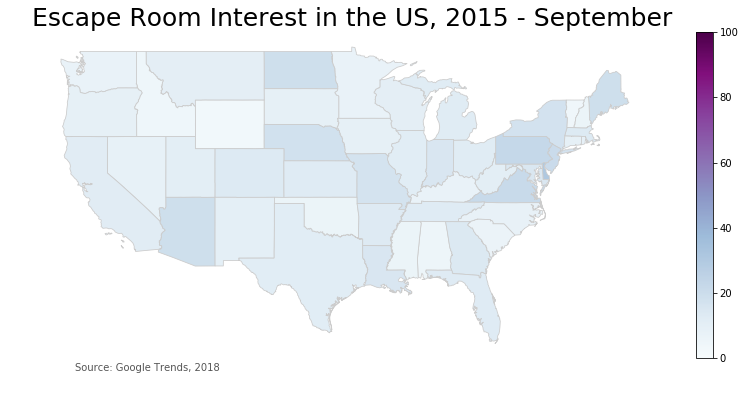

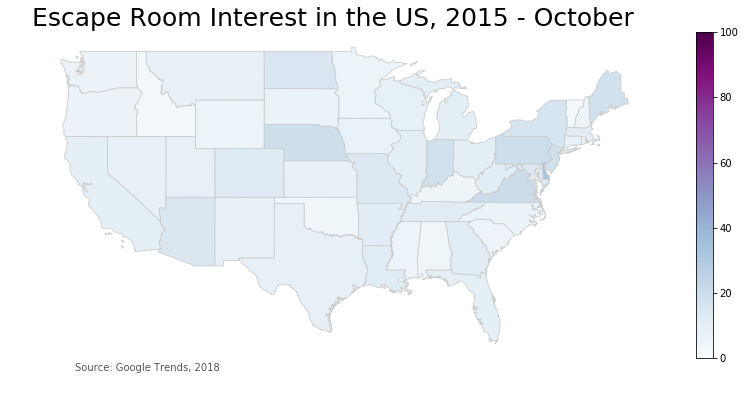

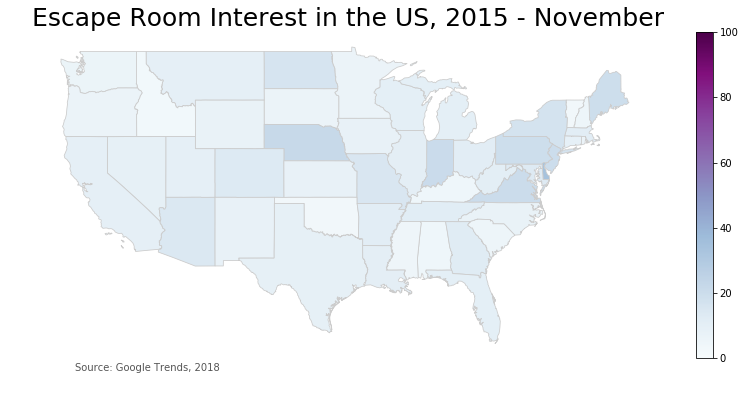

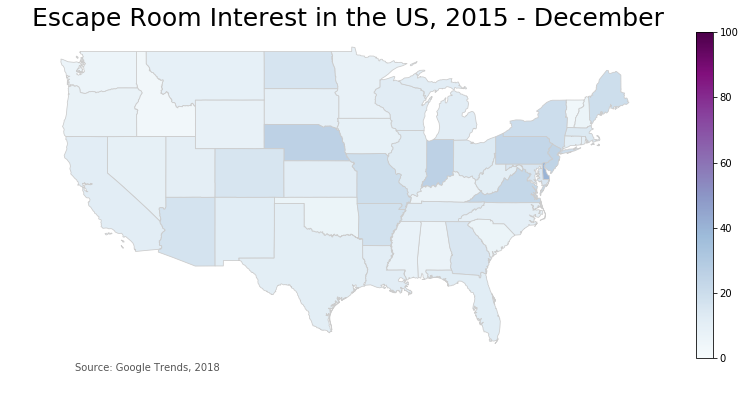

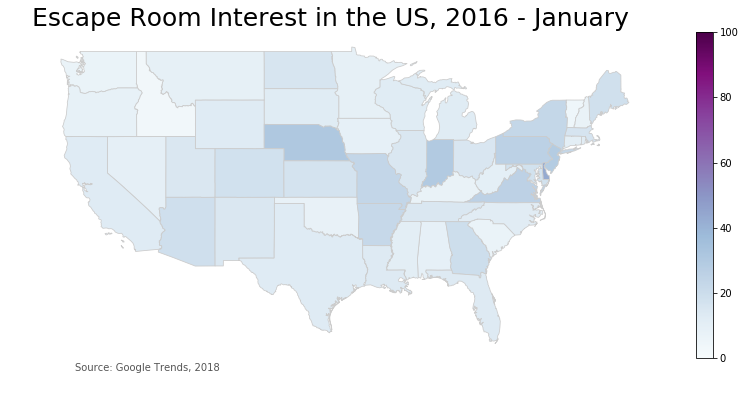

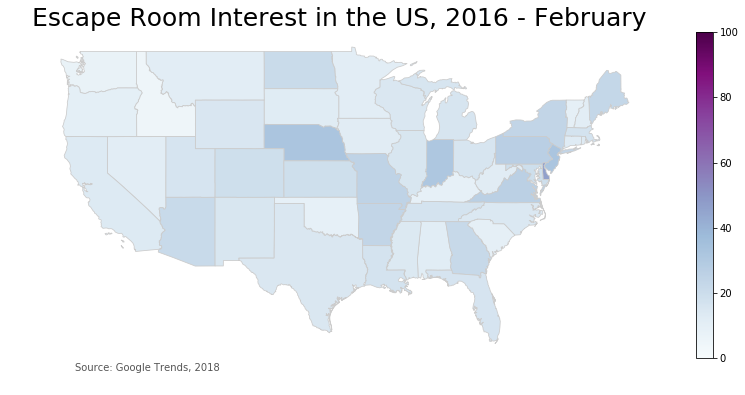

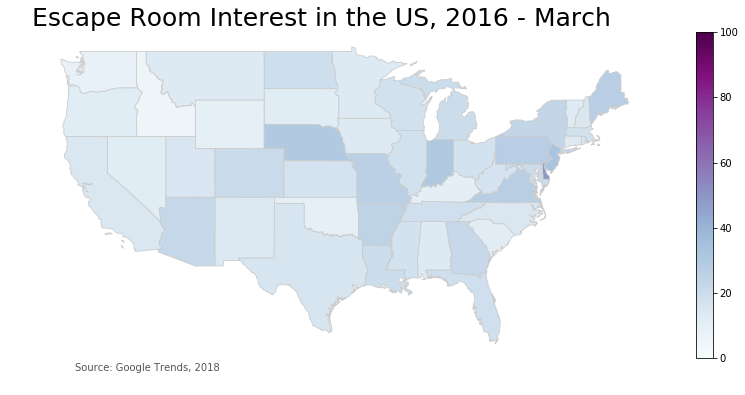

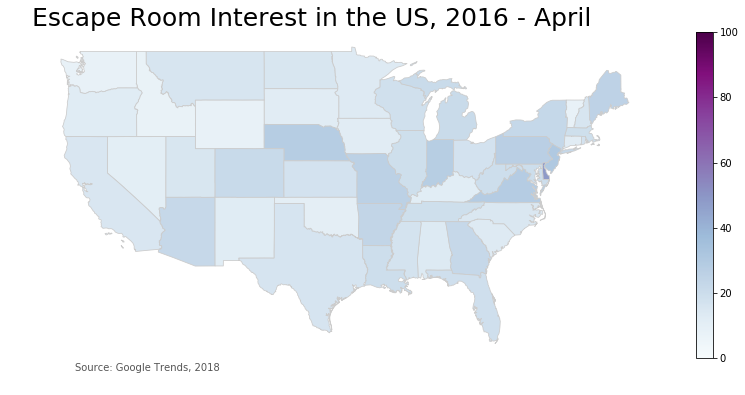

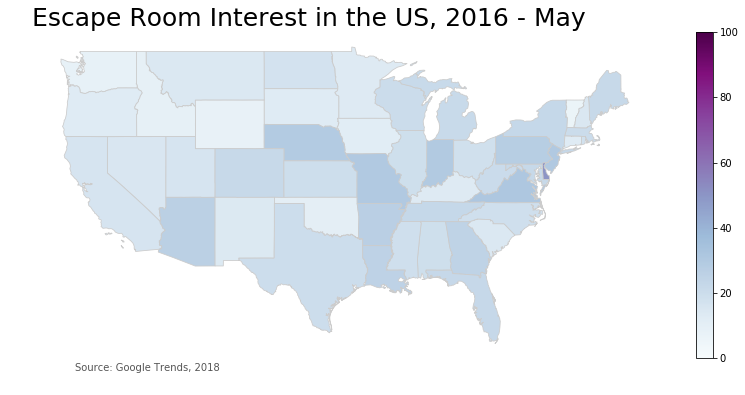

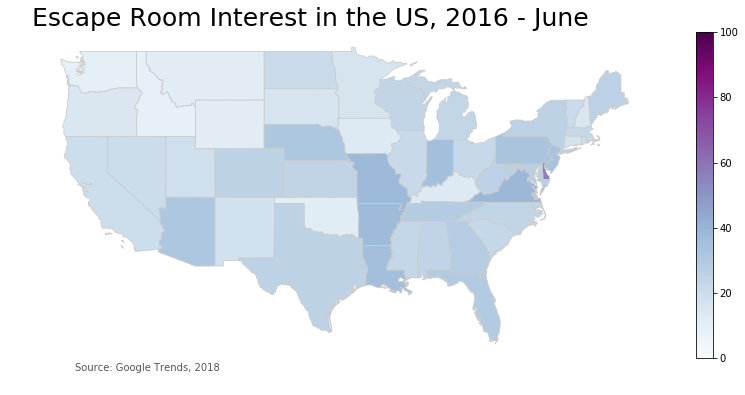

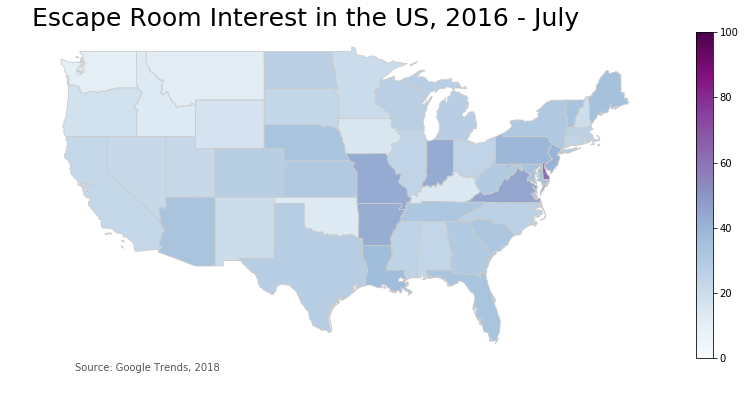

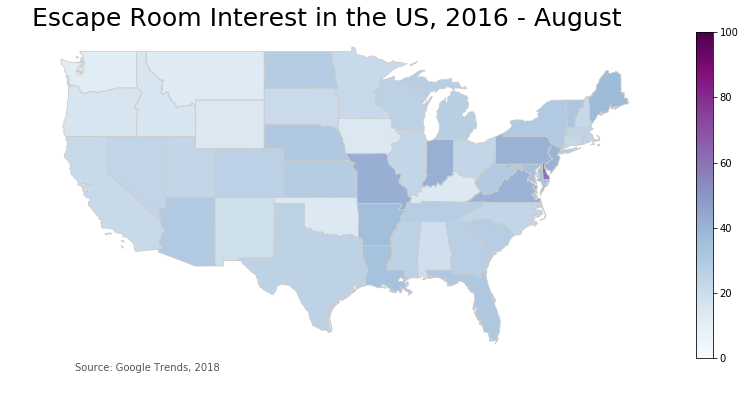

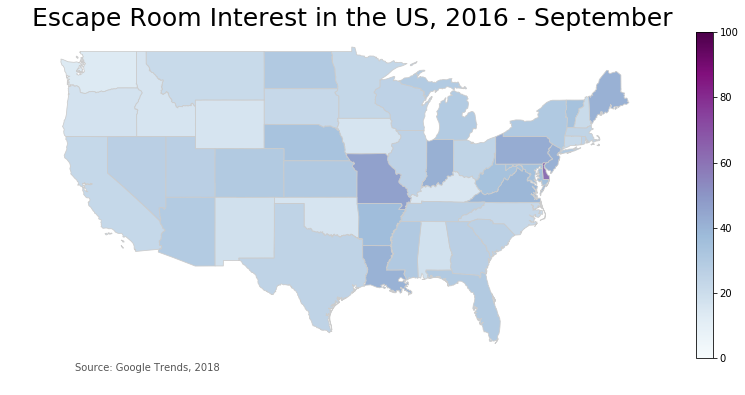

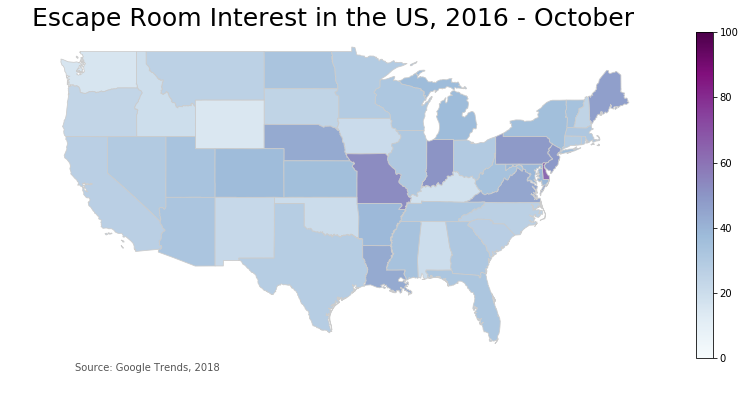

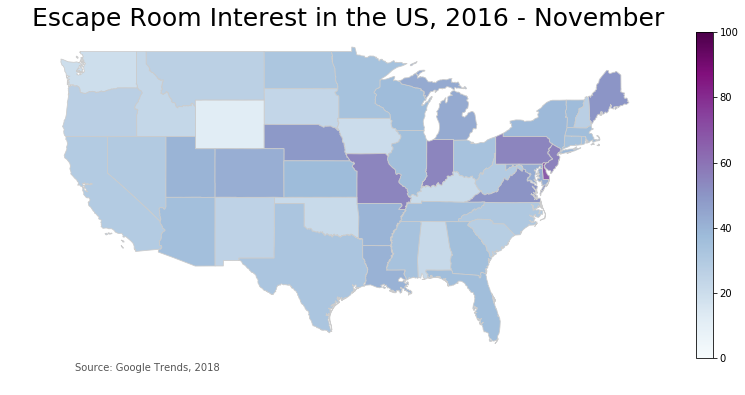

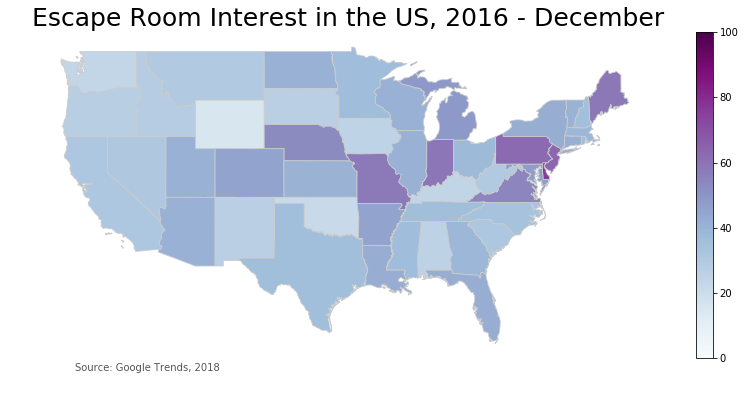

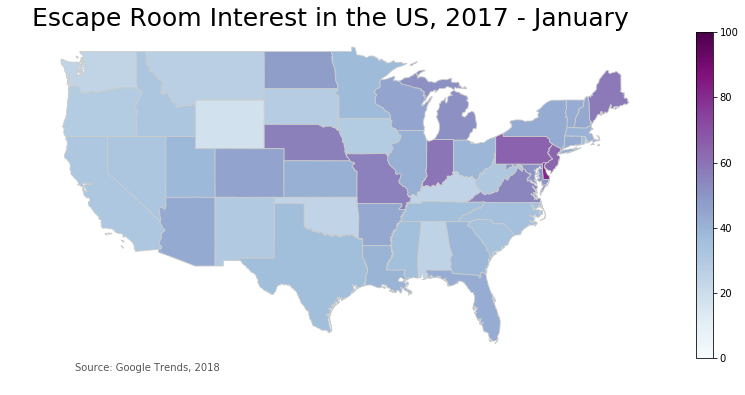

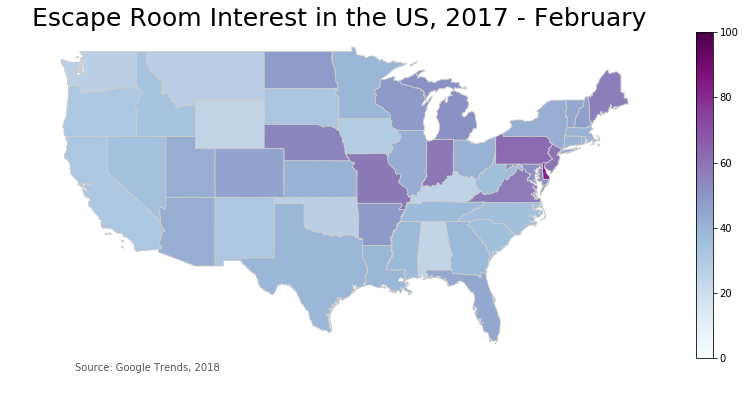

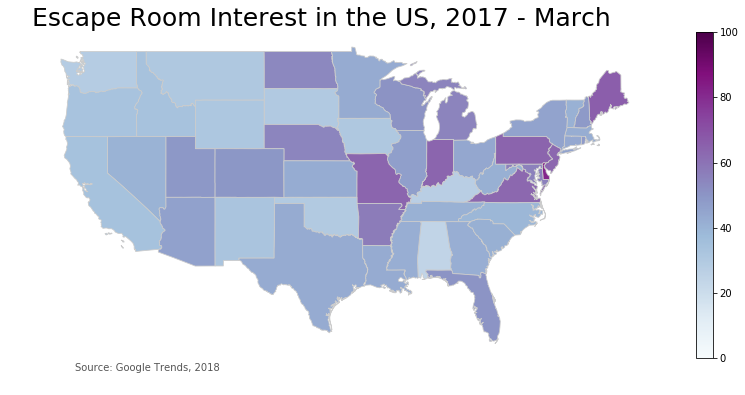

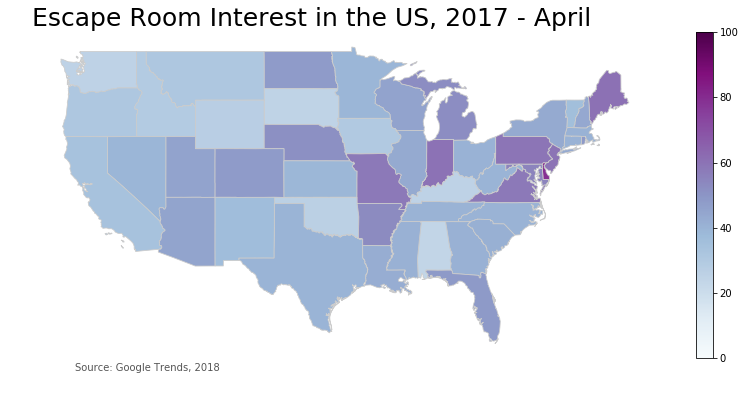

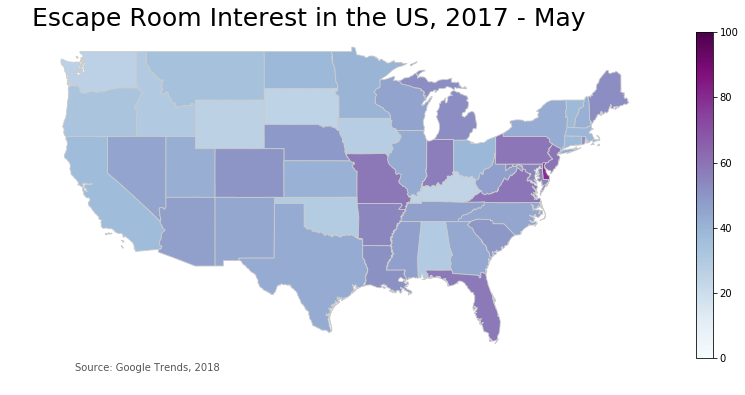

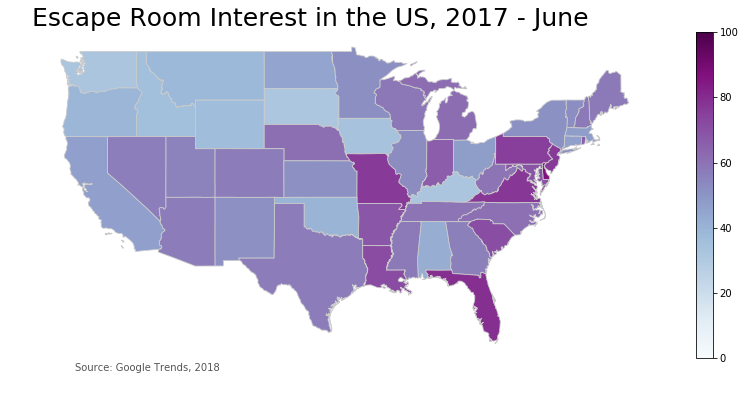

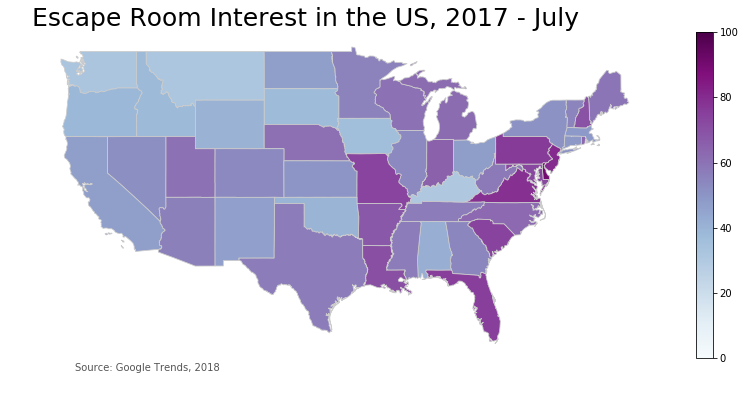

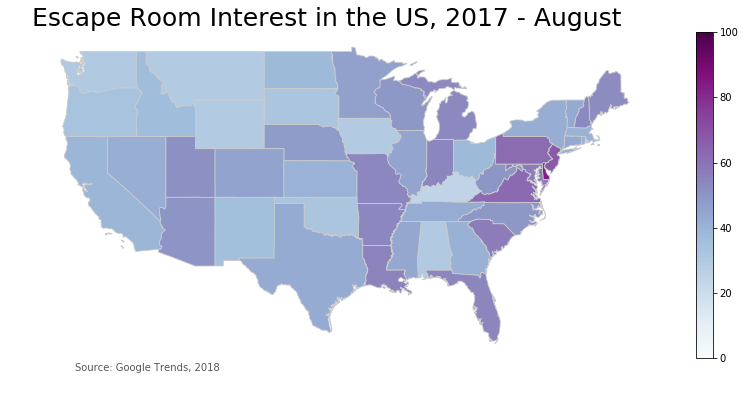

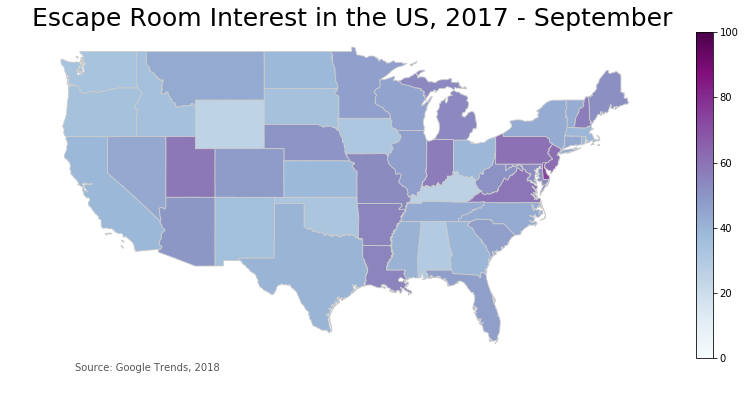

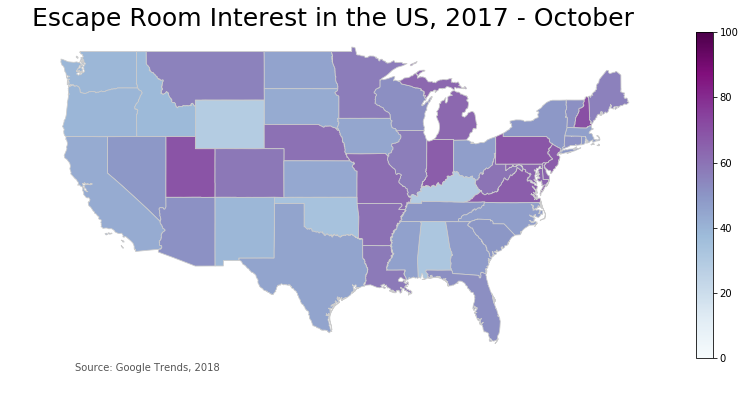

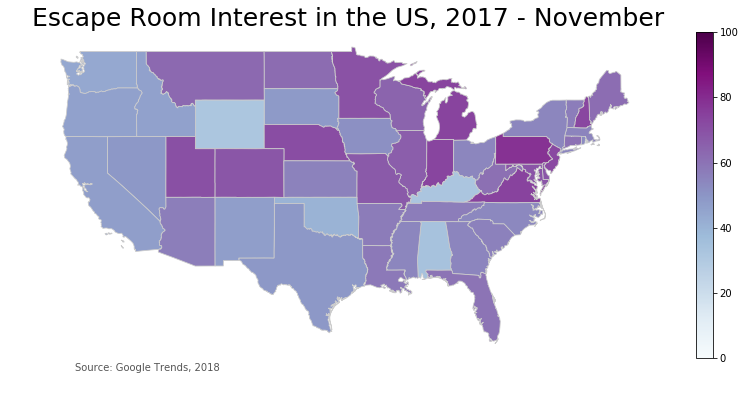

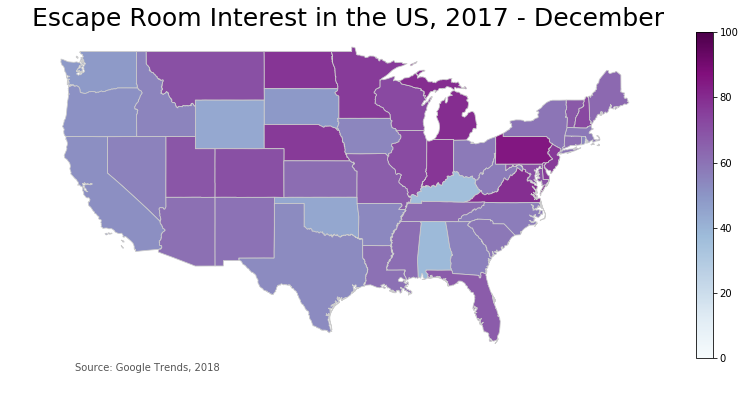

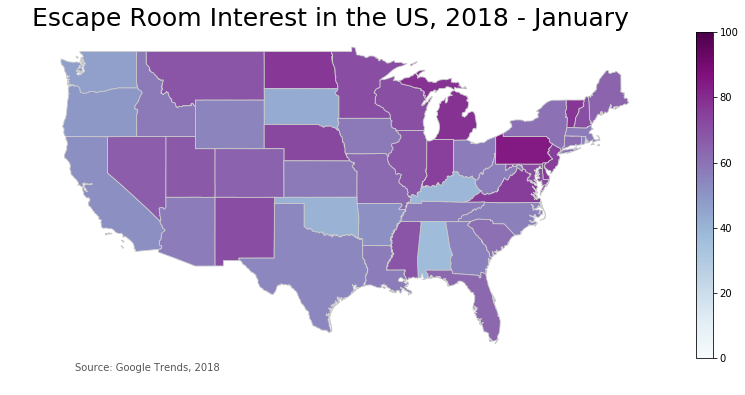

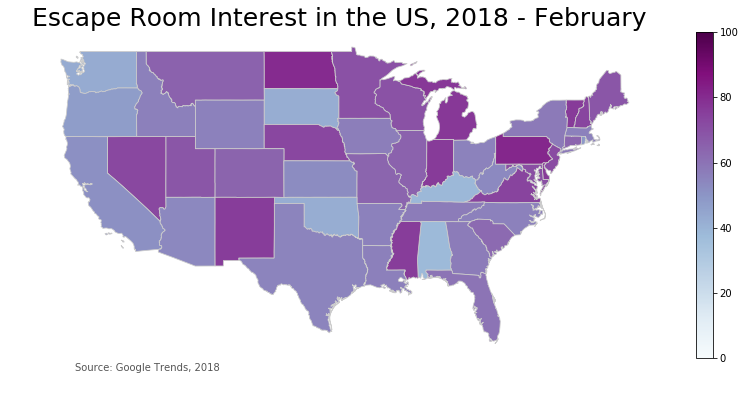

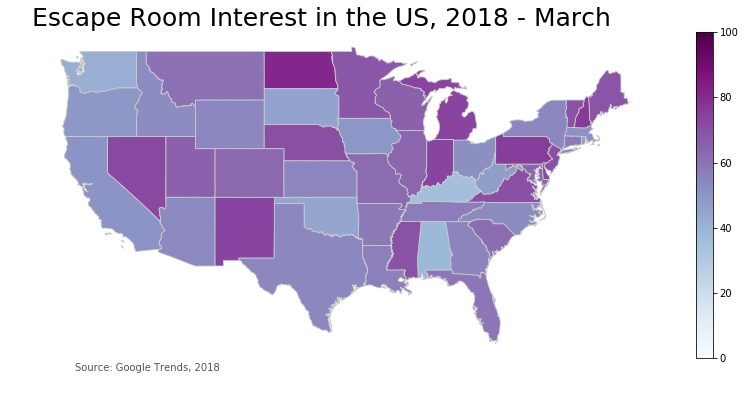

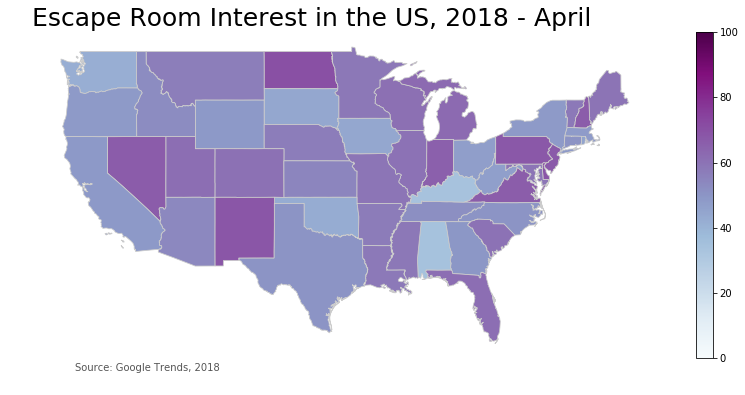

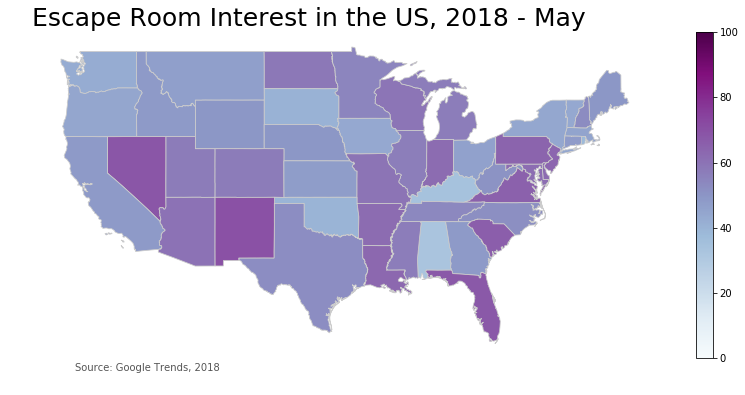

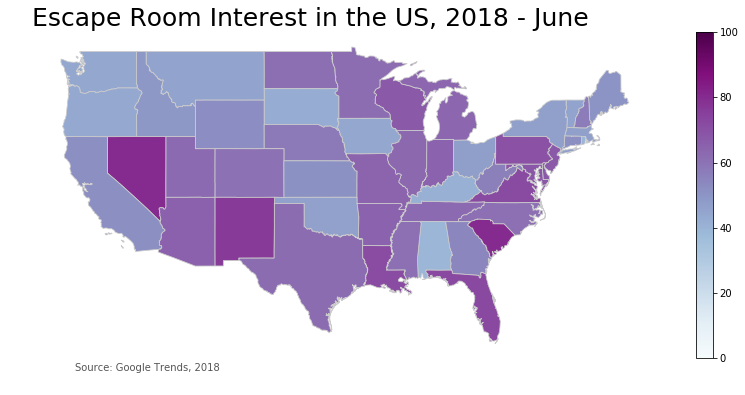

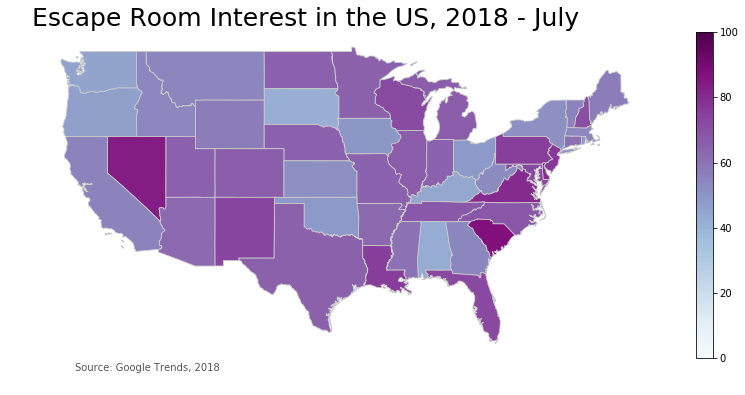

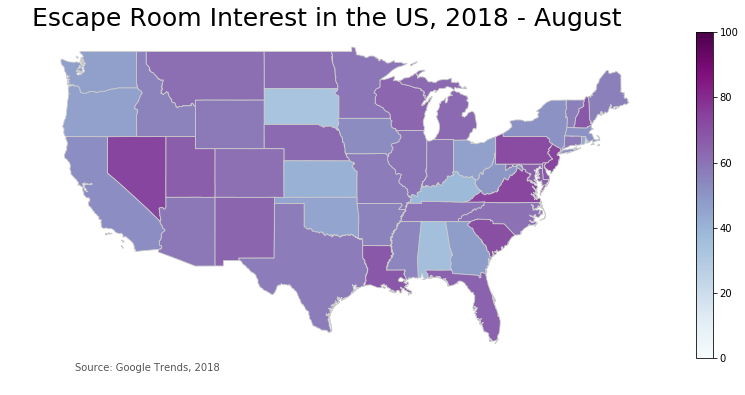

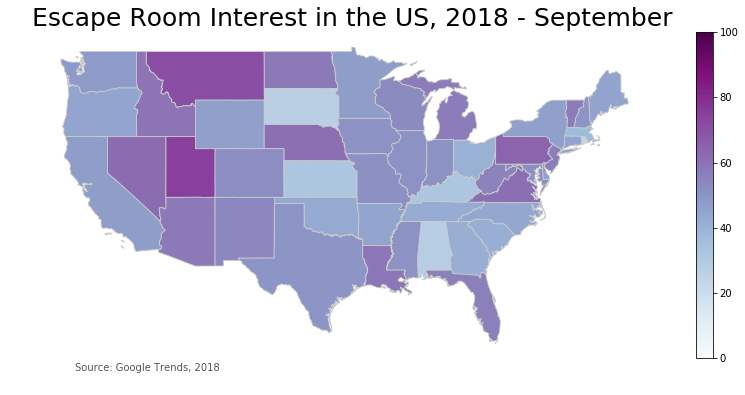

In [36]:
#choropleth range needs to be static for each png
vmin, vmax = 0, 100
    
for i in range(12,len(list_of_months)):

    fig, ax = plt.subplots(1, figsize=(14, 6))

    # create map
    merged.plot(column=list_of_months[i], cmap='BuPu', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.8', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    ax.axis('off')
    
    #Create 'month' and 'year' math
    year = int(i/12) + 2013
    month = nums_to_months.get((i+1)%12)
    
    # add a title
    ax.set_title('Escape Room Interest in the US, ' + str(year)  + ' - ' + str(month), \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'}, loc='left')

    # create an annotation
    ax.annotate('Source: Google Trends, 2018',
               xy=(0.1, .08), xycoords='figure fraction',
               horizontalalignment='left', verticalalignment='top',
               fontsize=10, color='#555555')

    # Create colorbar
    sm = plt.cm.ScalarMappable(cmap='BuPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)

    # Save the images to one folder for later conversion
    fig.savefig('Take_4/'+list_of_months[i]+'.png', dpi=100)